# TSM Stock Price Analysis
## Identifying Patterns in Taiwan Semiconductor (TSM) Stock Data

This notebook analyzes TSM stock price data from December 2024 to December 2025 to identify noticeable patterns including:
- Price trends and support/resistance levels
- Volume patterns and anomalies
- Volatility analysis with Bollinger Bands
- Moving average crossovers
- Return distribution characteristics

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Prepare Data

In [2]:
# Load the TSM stock data
df = pd.read_csv('TSM_20241227_20251230.csv')

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display basic information
print("=" * 60)
print("TSM STOCK DATA OVERVIEW")
print("=" * 60)
print(f"\nDate Range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"Total Trading Days: {len(df)}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print("\nFirst 5 rows:")
df.head()

TSM STOCK DATA OVERVIEW

Date Range: 2024-12-27 to 2025-12-29
Total Trading Days: 251

Data Types:
Open             float64
High             float64
Low              float64
Close            float64
AdjustedClose    float64
Volume             int64
dtype: object

Missing Values:
Open             0
High             0
Low              0
Close            0
AdjustedClose    0
Volume           0
dtype: int64

First 5 rows:


,Open,High,Low,Close,AdjustedClose,Volume
Date,,,,,,
2024-12-27,204.500000,204.500000,199.050003,201.630005,198.949310,10664400
2024-12-30,199.839996,201.970001,198.479996,200.389999,197.725784,11235200
2024-12-31,200.789993,201.779999,197.360001,197.490005,194.864349,6427900
2025-01-02,197.000000,203.770004,196.690002,201.580002,198.899979,10951400
2025-01-03,204.100006,208.800003,203.699997,208.610001,205.836533,10261900


## 3. Exploratory Data Analysis

In [3]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
print(df.describe().round(2))

# Key metrics
print("\n" + "=" * 60)
print("KEY PRICE METRICS")
print("=" * 60)
print(f"Starting Price (Close): ${df['Close'].iloc[0]:.2f}")
print(f"Ending Price (Close): ${df['Close'].iloc[-1]:.2f}")
print(f"Minimum Price: ${df['Close'].min():.2f} on {df['Close'].idxmin().strftime('%Y-%m-%d')}")
print(f"Maximum Price: ${df['Close'].max():.2f} on {df['Close'].idxmax().strftime('%Y-%m-%d')}")
print(f"Price Range: ${df['Close'].max() - df['Close'].min():.2f}")
print(f"Total Return: {((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100:.2f}%")

print("\n" + "=" * 60)
print("VOLUME METRICS")
print("=" * 60)
print(f"Average Daily Volume: {df['Volume'].mean():,.0f}")
print(f"Maximum Volume: {df['Volume'].max():,.0f} on {df['Volume'].idxmax().strftime('%Y-%m-%d')}")
print(f"Minimum Volume: {df['Volume'].min():,.0f} on {df['Volume'].idxmin().strftime('%Y-%m-%d')}")

STATISTICAL SUMMARY
         Open    High     Low   Close  AdjustedClose       Volume
count  251.00  251.00  251.00  251.00         251.00       251.00
mean   229.43  232.30  226.20  229.37         227.87  14012294.42
std     46.67   46.83   46.05   46.29          46.80   7186494.77
min    134.51  150.28  134.25  141.37         140.03   2753900.00
25%    194.44  196.15  191.55  194.42         192.38   9935700.00
50%    226.22  228.88  224.00  227.33         226.00  12220300.00
75%    275.62  280.03  273.13  277.23         276.86  16200800.00
max    310.93  313.98  302.50  310.14         309.31  68667500.00

KEY PRICE METRICS
Starting Price (Close): $201.63
Ending Price (Close): $300.92
Minimum Price: $141.37 on 2025-04-08
Maximum Price: $310.14 on 2025-12-10
Price Range: $168.77
Total Return: 49.24%

VOLUME METRICS
Average Daily Volume: 14,012,294
Maximum Volume: 68,667,500 on 2025-01-27
Minimum Volume: 2,753,900 on 2025-12-24


## 4. Price Trend Analysis

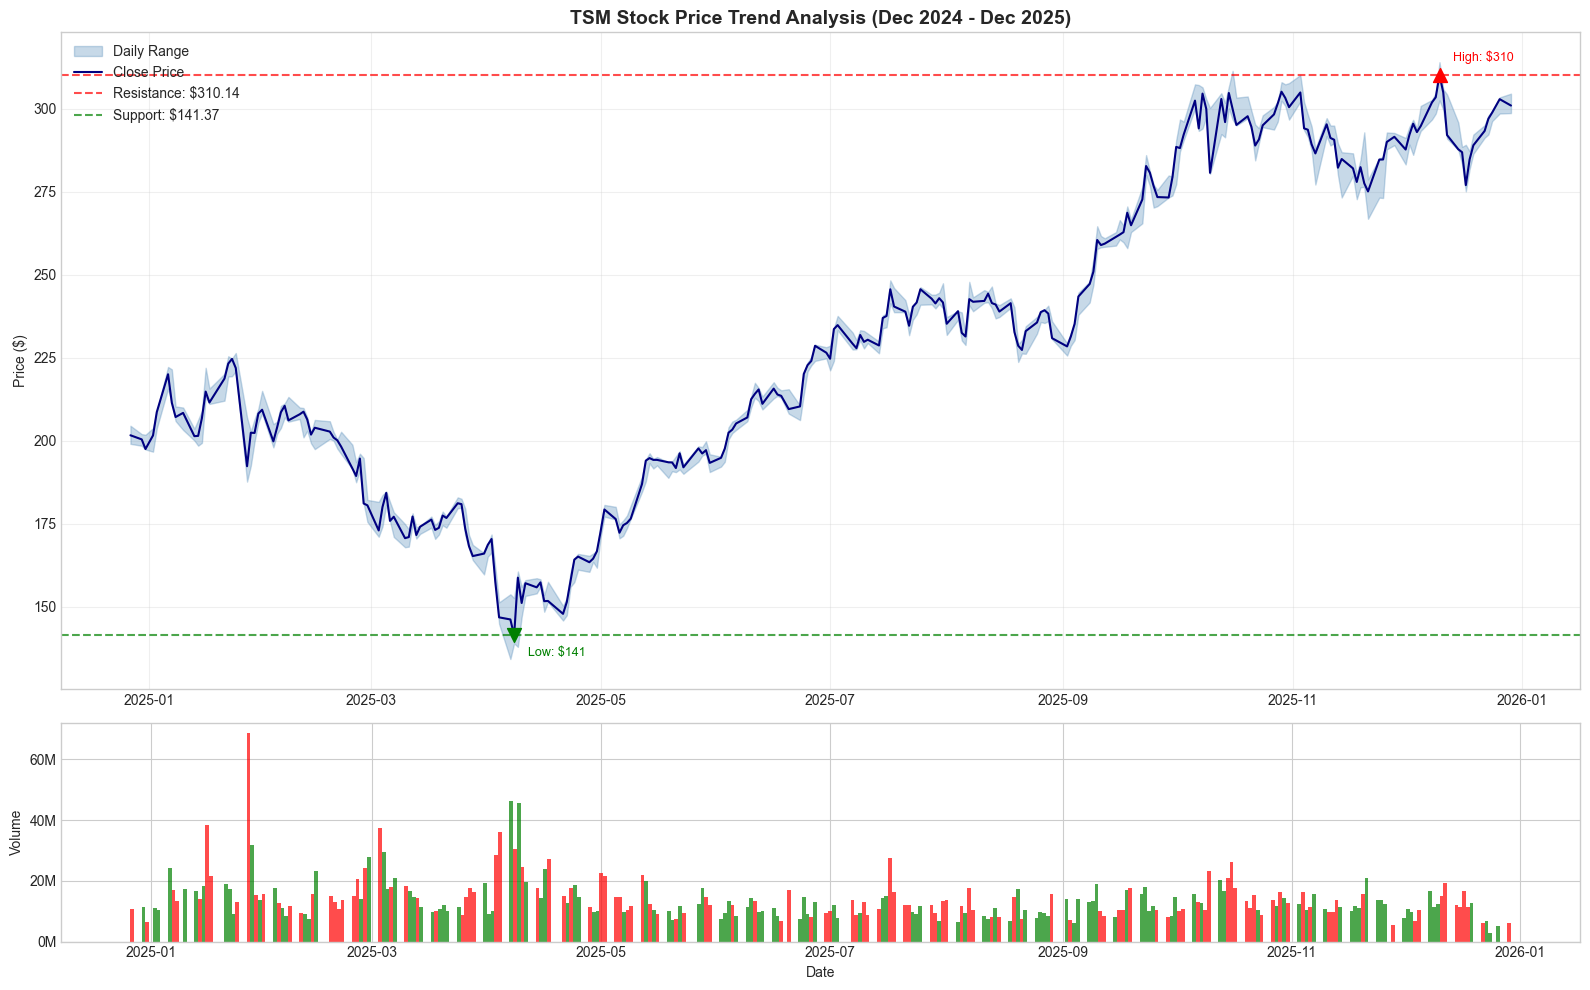


TREND PHASE ANALYSIS

Monthly Performance:
2025-01: +5.99% 📈 Bullish
2025-02: -13.75% 📉 Bearish
2025-03: -8.05% 📉 Bearish
2025-04: +0.42% ➡️ Neutral
2025-05: +15.98% 📈 Bullish
2025-06: +17.16% 📈 Bullish
2025-07: +6.68% 📈 Bullish
2025-08: -4.45% 📉 Bearish
2025-09: +20.97% 📈 Bullish
2025-10: +7.57% 📈 Bullish
2025-11: -2.97% 📉 Bearish
2025-12: +3.23% 📈 Bullish


In [4]:
# Price trend visualization with OHLC
fig, axes = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'height_ratios': [3, 1]})

# Main price chart
ax1 = axes[0]
ax1.fill_between(df.index, df['Low'], df['High'], alpha=0.3, color='steelblue', label='Daily Range')
ax1.plot(df.index, df['Close'], color='navy', linewidth=1.5, label='Close Price')

# Add key support/resistance levels
resistance = df['Close'].max()
support = df['Close'].min()
ax1.axhline(y=resistance, color='red', linestyle='--', alpha=0.7, label=f'Resistance: ${resistance:.2f}')
ax1.axhline(y=support, color='green', linestyle='--', alpha=0.7, label=f'Support: ${support:.2f}')

# Mark significant events
max_date = df['Close'].idxmax()
min_date = df['Close'].idxmin()
ax1.scatter([max_date], [df['Close'].loc[max_date]], color='red', s=100, zorder=5, marker='^')
ax1.scatter([min_date], [df['Close'].loc[min_date]], color='green', s=100, zorder=5, marker='v')
ax1.annotate(f'High: ${resistance:.0f}', xy=(max_date, resistance), xytext=(10, 10), 
             textcoords='offset points', fontsize=9, color='red')
ax1.annotate(f'Low: ${support:.0f}', xy=(min_date, support), xytext=(10, -15), 
             textcoords='offset points', fontsize=9, color='green')

ax1.set_title('TSM Stock Price Trend Analysis (Dec 2024 - Dec 2025)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Volume subplot
ax2 = axes[1]
colors = ['green' if df['Close'].iloc[i] >= df['Open'].iloc[i] else 'red' for i in range(len(df))]
ax2.bar(df.index, df['Volume'], color=colors, alpha=0.7, width=1)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

# Identify trend phases
print("\n" + "=" * 60)
print("TREND PHASE ANALYSIS")
print("=" * 60)

# Calculate monthly returns to identify trend changes
df_monthly = df['Close'].resample('M').last()
monthly_returns = df_monthly.pct_change().dropna()

print("\nMonthly Performance:")
for date, ret in monthly_returns.items():
    trend = "📈 Bullish" if ret > 0.02 else ("📉 Bearish" if ret < -0.02 else "➡️ Neutral")
    print(f"{date.strftime('%Y-%m')}: {ret*100:+.2f}% {trend}")

## 5. Volume Analysis

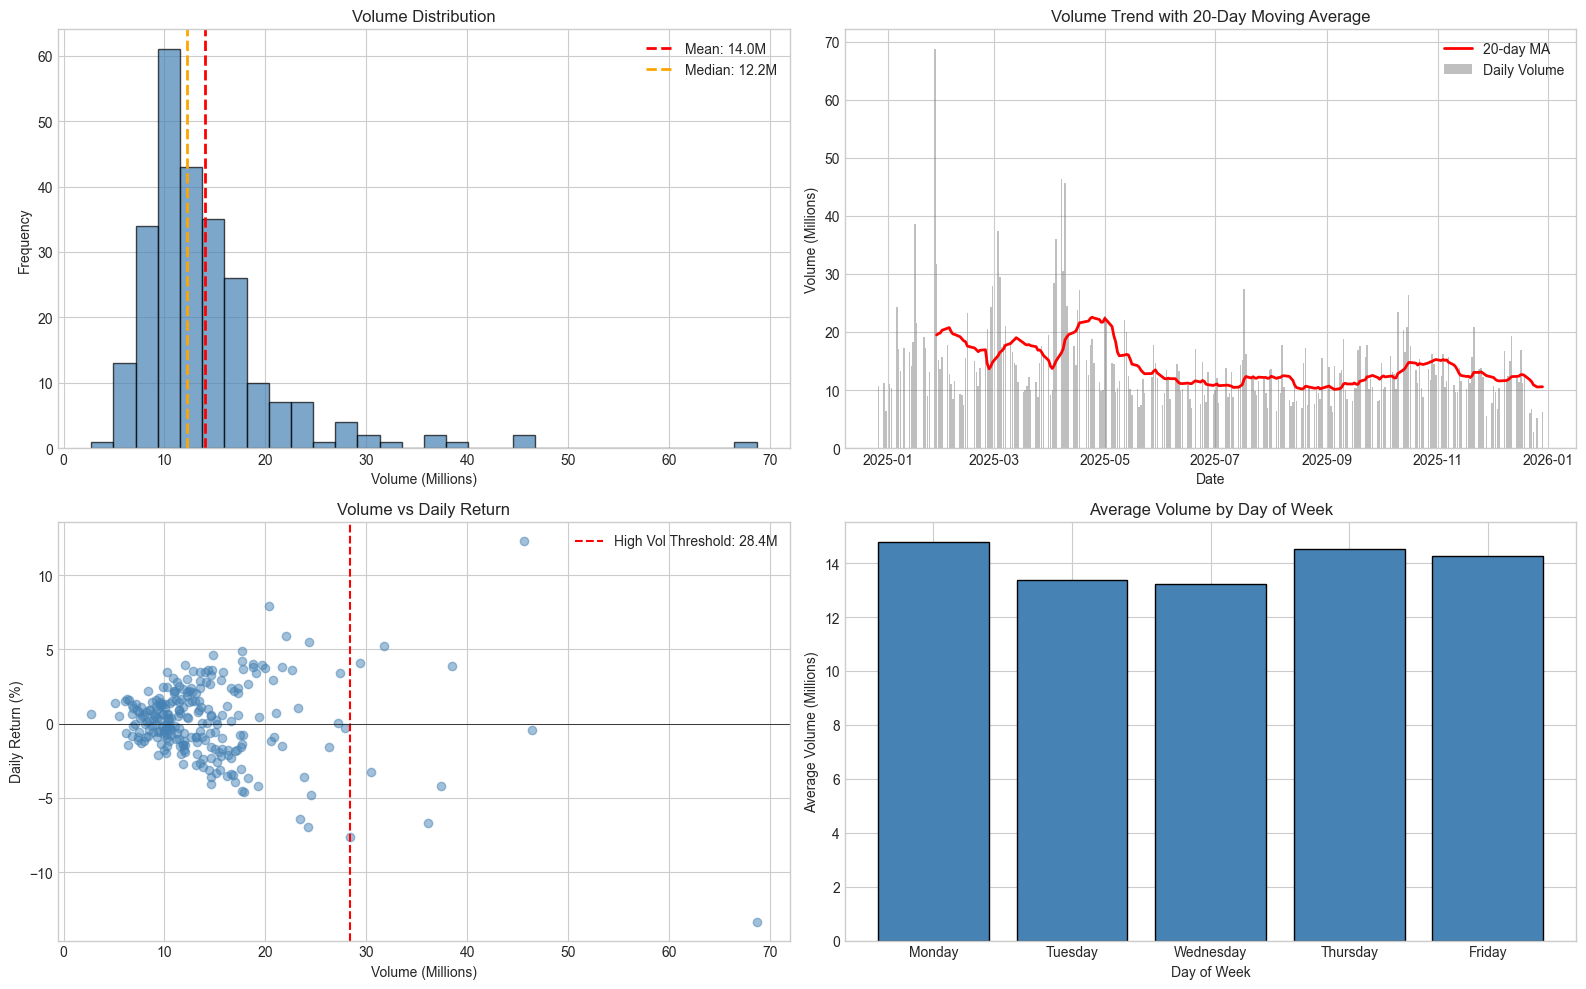


HIGH VOLUME DAYS ANALYSIS (>2 Std Dev from Mean)

Threshold: 28,385,284 shares
Number of high volume days: 9

Top 10 Highest Volume Days:
                  Open       Close      Volume  Return %
Date                                                    
2025-01-27  197.039993  192.309998  68,667,500     -2.40
2025-04-07  134.509995  146.169998  46,388,300      8.67
2025-04-09  140.199997  158.750000  45,612,500     13.23
2025-01-16  218.889999  214.789993  38,539,600     -1.87
2025-03-03  181.149994  172.970001  37,403,000     -4.52
2025-04-04  150.889999  146.800003  36,085,100     -2.71
2025-01-28  195.649994  202.399994  31,738,800      3.45
2025-04-08  151.979996  141.369995  30,479,700     -6.98
2025-03-04  175.059998  180.000000  29,395,200      2.82
2025-04-03  160.059998  157.380005  28,370,500     -1.67


In [5]:
# Volume analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Volume distribution
ax1 = axes[0, 0]
ax1.hist(df['Volume']/1e6, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(df['Volume'].mean()/1e6, color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Volume"].mean()/1e6:.1f}M')
ax1.axvline(df['Volume'].median()/1e6, color='orange', linestyle='--', linewidth=2, label=f'Median: {df["Volume"].median()/1e6:.1f}M')
ax1.set_xlabel('Volume (Millions)')
ax1.set_ylabel('Frequency')
ax1.set_title('Volume Distribution')
ax1.legend()

# 2. Volume over time with rolling average
ax2 = axes[0, 1]
ax2.bar(df.index, df['Volume']/1e6, alpha=0.5, color='gray', label='Daily Volume')
ax2.plot(df.index, df['Volume'].rolling(20).mean()/1e6, color='red', linewidth=2, label='20-day MA')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume (Millions)')
ax2.set_title('Volume Trend with 20-Day Moving Average')
ax2.legend()

# 3. High volume days analysis
ax3 = axes[1, 0]
volume_threshold = df['Volume'].mean() + 2 * df['Volume'].std()
high_vol_days = df[df['Volume'] > volume_threshold]
daily_return = df['Close'].pct_change() * 100

ax3.scatter(df['Volume']/1e6, daily_return, alpha=0.5, c='steelblue')
ax3.axvline(volume_threshold/1e6, color='red', linestyle='--', label=f'High Vol Threshold: {volume_threshold/1e6:.1f}M')
ax3.axhline(0, color='black', linestyle='-', linewidth=0.5)
ax3.set_xlabel('Volume (Millions)')
ax3.set_ylabel('Daily Return (%)')
ax3.set_title('Volume vs Daily Return')
ax3.legend()

# 4. Day of week volume pattern
ax4 = axes[1, 1]
df['DayOfWeek'] = df.index.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekly_volume = df.groupby('DayOfWeek')['Volume'].mean()
ax4.bar(day_names, weekly_volume/1e6, color='steelblue', edgecolor='black')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Volume (Millions)')
ax4.set_title('Average Volume by Day of Week')

plt.tight_layout()
plt.show()

# High volume day analysis
print("\n" + "=" * 60)
print("HIGH VOLUME DAYS ANALYSIS (>2 Std Dev from Mean)")
print("=" * 60)
print(f"\nThreshold: {volume_threshold:,.0f} shares")
print(f"Number of high volume days: {len(high_vol_days)}")
print("\nTop 10 Highest Volume Days:")
top_volume = df.nlargest(10, 'Volume')[['Open', 'Close', 'Volume']]
top_volume['Return %'] = ((top_volume['Close'] - top_volume['Open']) / top_volume['Open'] * 100).round(2)
top_volume['Volume'] = top_volume['Volume'].apply(lambda x: f'{x:,.0f}')
print(top_volume.to_string())

## 6. Volatility Analysis with Bollinger Bands

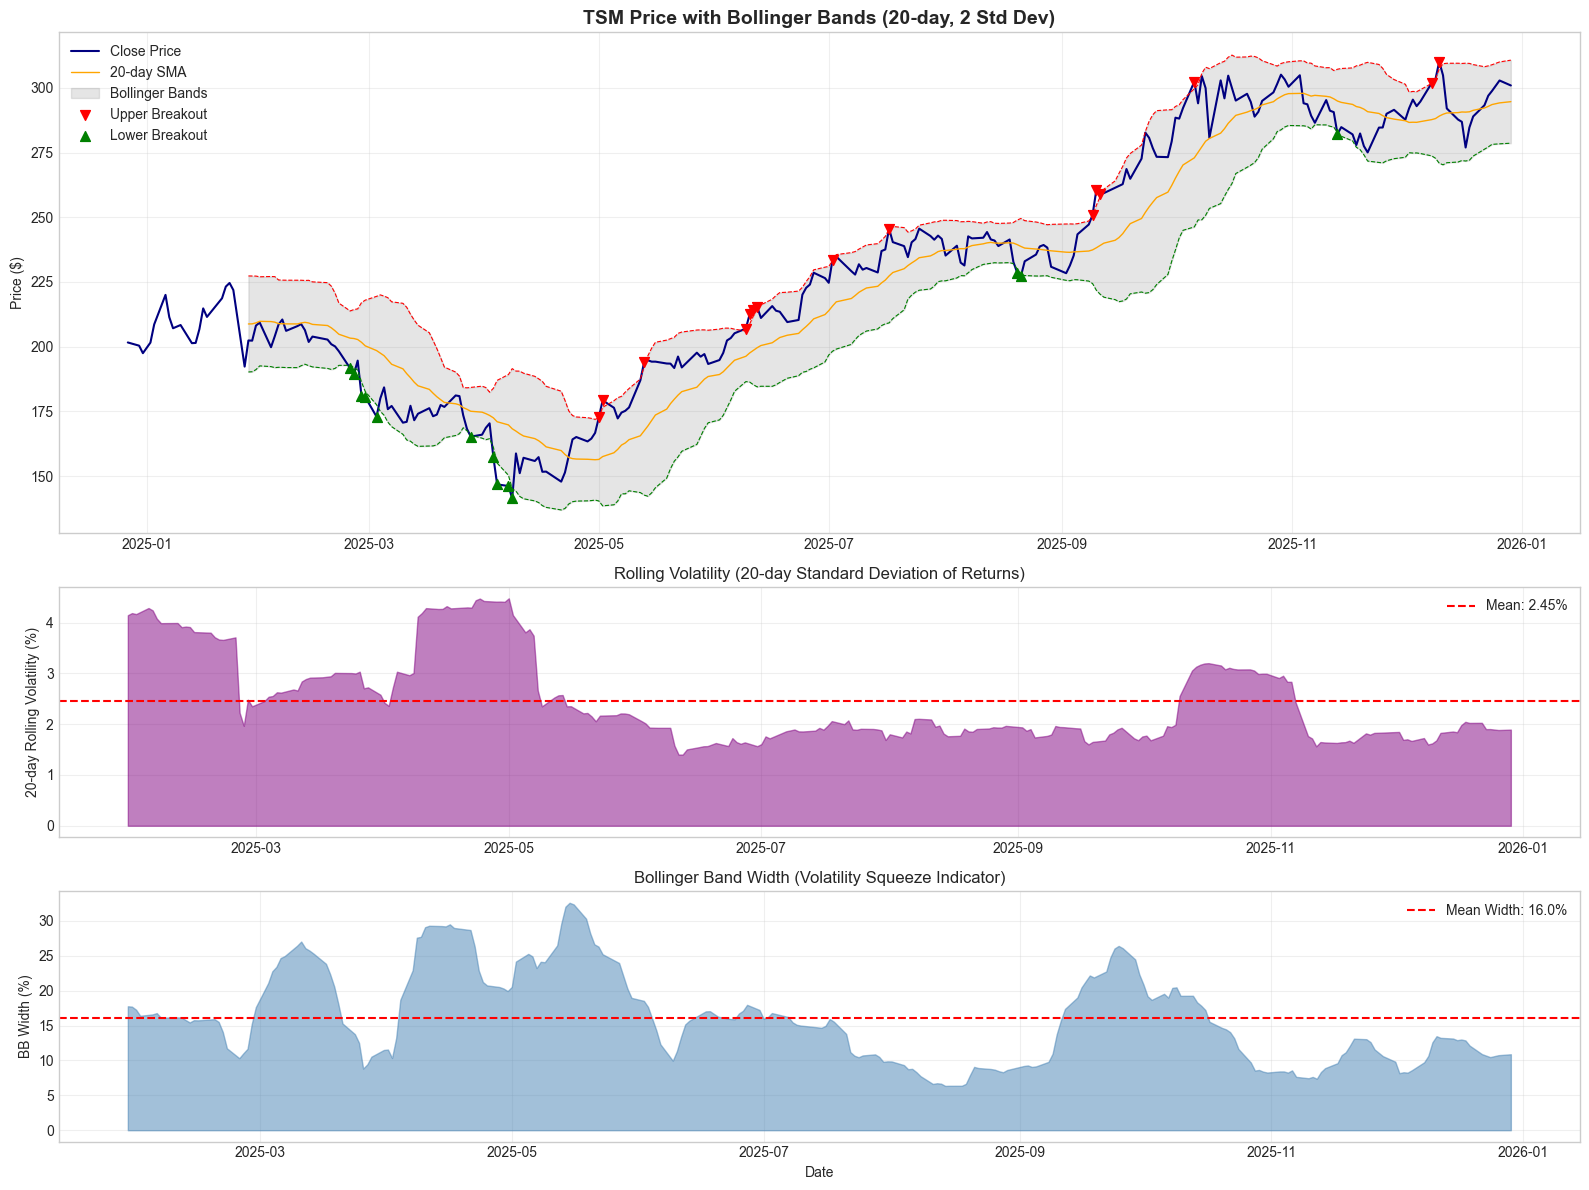


VOLATILITY REGIME ANALYSIS

Average 20-day Rolling Volatility: 2.45%
High Volatility Days (>1.5x avg): 36 days
Low Volatility Days (<0.5x avg): 0 days

Bollinger Band Breakouts:
  Upper Band Breakouts: 15
  Lower Band Breakouts: 13


In [6]:
# Calculate daily returns and volatility metrics
df['Daily_Return'] = df['Close'].pct_change() * 100
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Bollinger Bands
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_BB'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
df['Lower_BB'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()
df['BB_Width'] = (df['Upper_BB'] - df['Lower_BB']) / df['SMA_20'] * 100  # Percentage width

# Volatility visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [2, 1, 1]})

# 1. Price with Bollinger Bands
ax1 = axes[0]
ax1.plot(df.index, df['Close'], label='Close Price', color='navy', linewidth=1.5)
ax1.plot(df.index, df['SMA_20'], label='20-day SMA', color='orange', linewidth=1)
ax1.fill_between(df.index, df['Upper_BB'], df['Lower_BB'], alpha=0.2, color='gray', label='Bollinger Bands')
ax1.plot(df.index, df['Upper_BB'], color='red', linestyle='--', linewidth=0.8)
ax1.plot(df.index, df['Lower_BB'], color='green', linestyle='--', linewidth=0.8)

# Mark breakouts
upper_breakouts = df[df['Close'] > df['Upper_BB']]
lower_breakouts = df[df['Close'] < df['Lower_BB']]
ax1.scatter(upper_breakouts.index, upper_breakouts['Close'], color='red', marker='v', s=50, label='Upper Breakout', zorder=5)
ax1.scatter(lower_breakouts.index, lower_breakouts['Close'], color='green', marker='^', s=50, label='Lower Breakout', zorder=5)

ax1.set_title('TSM Price with Bollinger Bands (20-day, 2 Std Dev)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Rolling Volatility
ax2 = axes[1]
ax2.fill_between(df.index, 0, df['Rolling_Volatility'], alpha=0.5, color='purple')
ax2.axhline(df['Rolling_Volatility'].mean(), color='red', linestyle='--', label=f'Mean: {df["Rolling_Volatility"].mean():.2f}%')
ax2.set_ylabel('20-day Rolling Volatility (%)')
ax2.set_title('Rolling Volatility (20-day Standard Deviation of Returns)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Bollinger Band Width
ax3 = axes[2]
ax3.fill_between(df.index, 0, df['BB_Width'], alpha=0.5, color='steelblue')
ax3.axhline(df['BB_Width'].mean(), color='red', linestyle='--', label=f'Mean Width: {df["BB_Width"].mean():.1f}%')
ax3.set_ylabel('BB Width (%)')
ax3.set_xlabel('Date')
ax3.set_title('Bollinger Band Width (Volatility Squeeze Indicator)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Volatility regime analysis
print("\n" + "=" * 60)
print("VOLATILITY REGIME ANALYSIS")
print("=" * 60)
avg_vol = df['Rolling_Volatility'].mean()
high_vol_periods = df[df['Rolling_Volatility'] > avg_vol * 1.5].dropna()
low_vol_periods = df[df['Rolling_Volatility'] < avg_vol * 0.5].dropna()

print(f"\nAverage 20-day Rolling Volatility: {avg_vol:.2f}%")
print(f"High Volatility Days (>1.5x avg): {len(high_vol_periods)} days")
print(f"Low Volatility Days (<0.5x avg): {len(low_vol_periods)} days")
print(f"\nBollinger Band Breakouts:")
print(f"  Upper Band Breakouts: {len(upper_breakouts)}")
print(f"  Lower Band Breakouts: {len(lower_breakouts)}")

## 7. Moving Averages and Crossovers

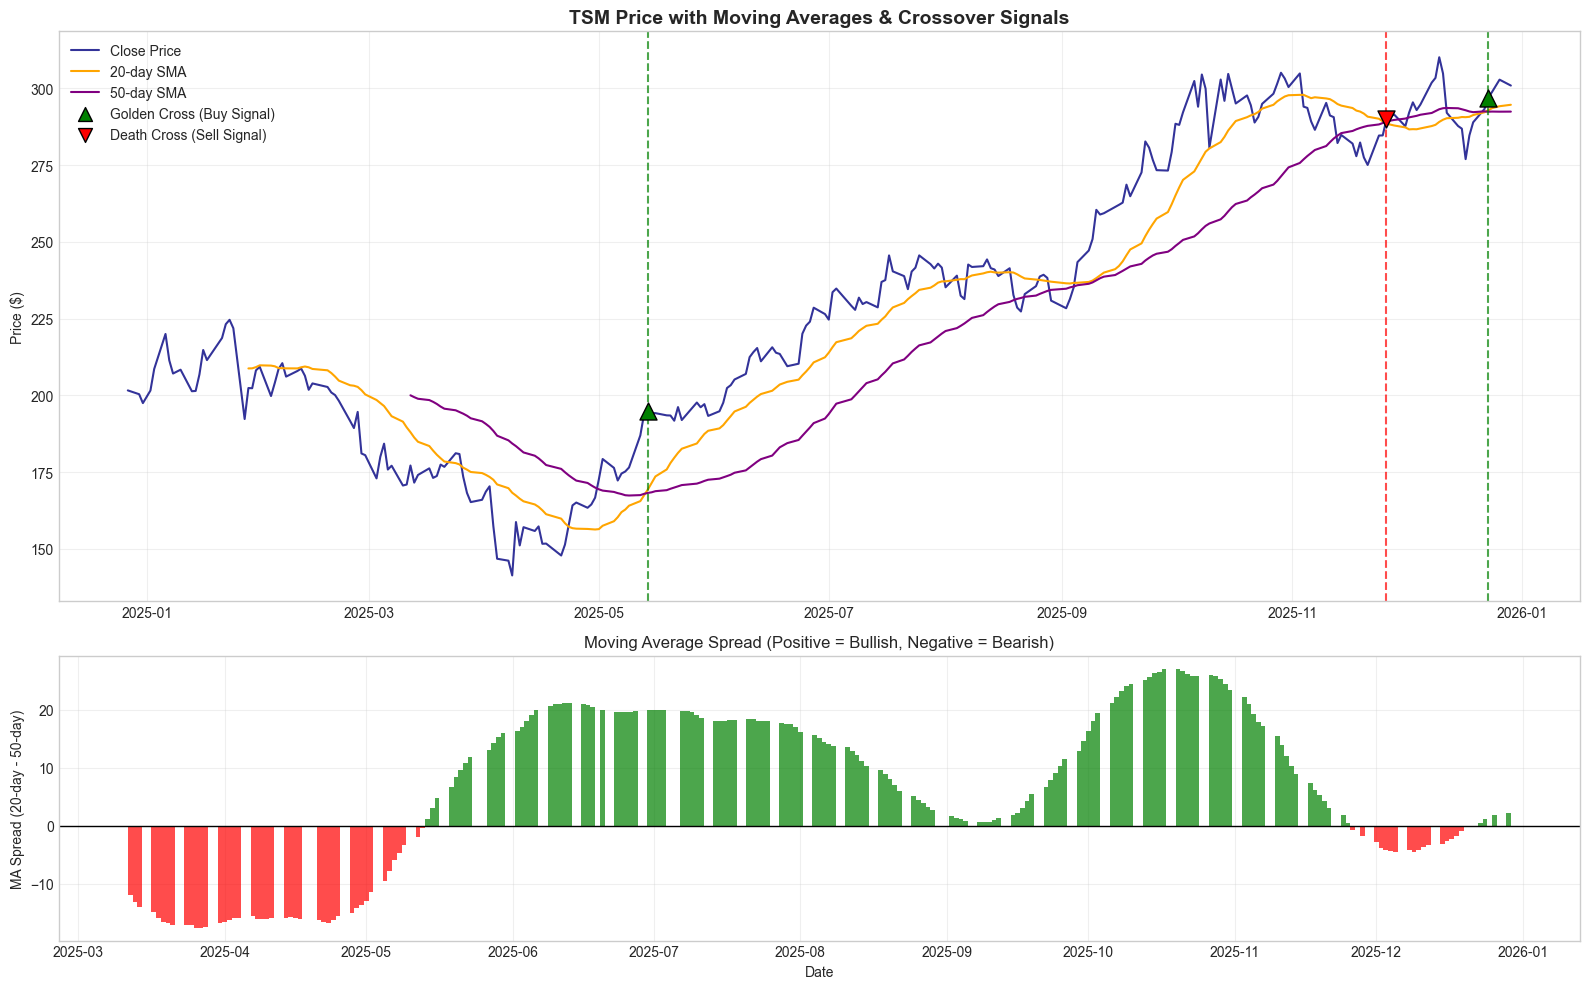


MOVING AVERAGE CROSSOVER SIGNALS

Golden Cross Events (Bullish - 20 SMA crosses above 50 SMA):
  📈 2025-05-14: Price = $194.76
  📈 2025-12-23: Price = $296.95

Death Cross Events (Bearish - 20 SMA crosses below 50 SMA):
  📉 2025-11-26: Price = $289.96

Current Trend: 📈 BULLISH (20 SMA > 50 SMA)


In [7]:
# Calculate moving averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Identify crossovers
df['MA_Cross_Signal'] = 0
df.loc[df['SMA_20'] > df['SMA_50'], 'MA_Cross_Signal'] = 1  # Bullish
df.loc[df['SMA_20'] < df['SMA_50'], 'MA_Cross_Signal'] = -1  # Bearish

# Detect actual crossover points
df['Crossover'] = df['MA_Cross_Signal'].diff()
golden_cross = df[df['Crossover'] == 2]  # 20-day crosses above 50-day
death_cross = df[df['Crossover'] == -2]   # 20-day crosses below 50-day

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'height_ratios': [2, 1]})

# 1. Price with Moving Averages
ax1 = axes[0]
ax1.plot(df.index, df['Close'], label='Close Price', color='navy', linewidth=1.5, alpha=0.8)
ax1.plot(df.index, df['SMA_20'], label='20-day SMA', color='orange', linewidth=1.5)
ax1.plot(df.index, df['SMA_50'], label='50-day SMA', color='purple', linewidth=1.5)

# Mark crossovers
for date in golden_cross.index:
    ax1.axvline(x=date, color='green', linestyle='--', alpha=0.7, linewidth=1.5)
    ax1.scatter([date], [df.loc[date, 'Close']], color='green', s=150, marker='^', zorder=5, edgecolor='black')
    
for date in death_cross.index:
    ax1.axvline(x=date, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    ax1.scatter([date], [df.loc[date, 'Close']], color='red', s=150, marker='v', zorder=5, edgecolor='black')

ax1.set_title('TSM Price with Moving Averages & Crossover Signals', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Add legend for crossovers
if len(golden_cross) > 0 or len(death_cross) > 0:
    ax1.scatter([], [], color='green', s=100, marker='^', label='Golden Cross (Buy Signal)', edgecolor='black')
    ax1.scatter([], [], color='red', s=100, marker='v', label='Death Cross (Sell Signal)', edgecolor='black')
    ax1.legend(loc='upper left')

# 2. MA Spread
ax2 = axes[1]
ma_spread = df['SMA_20'] - df['SMA_50']
colors = ['green' if x > 0 else 'red' for x in ma_spread]
ax2.bar(df.index, ma_spread, color=colors, alpha=0.7, width=1)
ax2.axhline(0, color='black', linewidth=1)
ax2.set_ylabel('MA Spread (20-day - 50-day)')
ax2.set_xlabel('Date')
ax2.set_title('Moving Average Spread (Positive = Bullish, Negative = Bearish)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Crossover summary
print("\n" + "=" * 60)
print("MOVING AVERAGE CROSSOVER SIGNALS")
print("=" * 60)
print(f"\nGolden Cross Events (Bullish - 20 SMA crosses above 50 SMA):")
if len(golden_cross) > 0:
    for date in golden_cross.index:
        price = df.loc[date, 'Close']
        print(f"  📈 {date.strftime('%Y-%m-%d')}: Price = ${price:.2f}")
else:
    print("  None detected")

print(f"\nDeath Cross Events (Bearish - 20 SMA crosses below 50 SMA):")
if len(death_cross) > 0:
    for date in death_cross.index:
        price = df.loc[date, 'Close']
        print(f"  📉 {date.strftime('%Y-%m-%d')}: Price = ${price:.2f}")
else:
    print("  None detected")

print(f"\nCurrent Trend: ", end="")
if df['SMA_20'].iloc[-1] > df['SMA_50'].iloc[-1]:
    print("📈 BULLISH (20 SMA > 50 SMA)")
else:
    print("📉 BEARISH (20 SMA < 50 SMA)")

## 8. Return Distribution Analysis

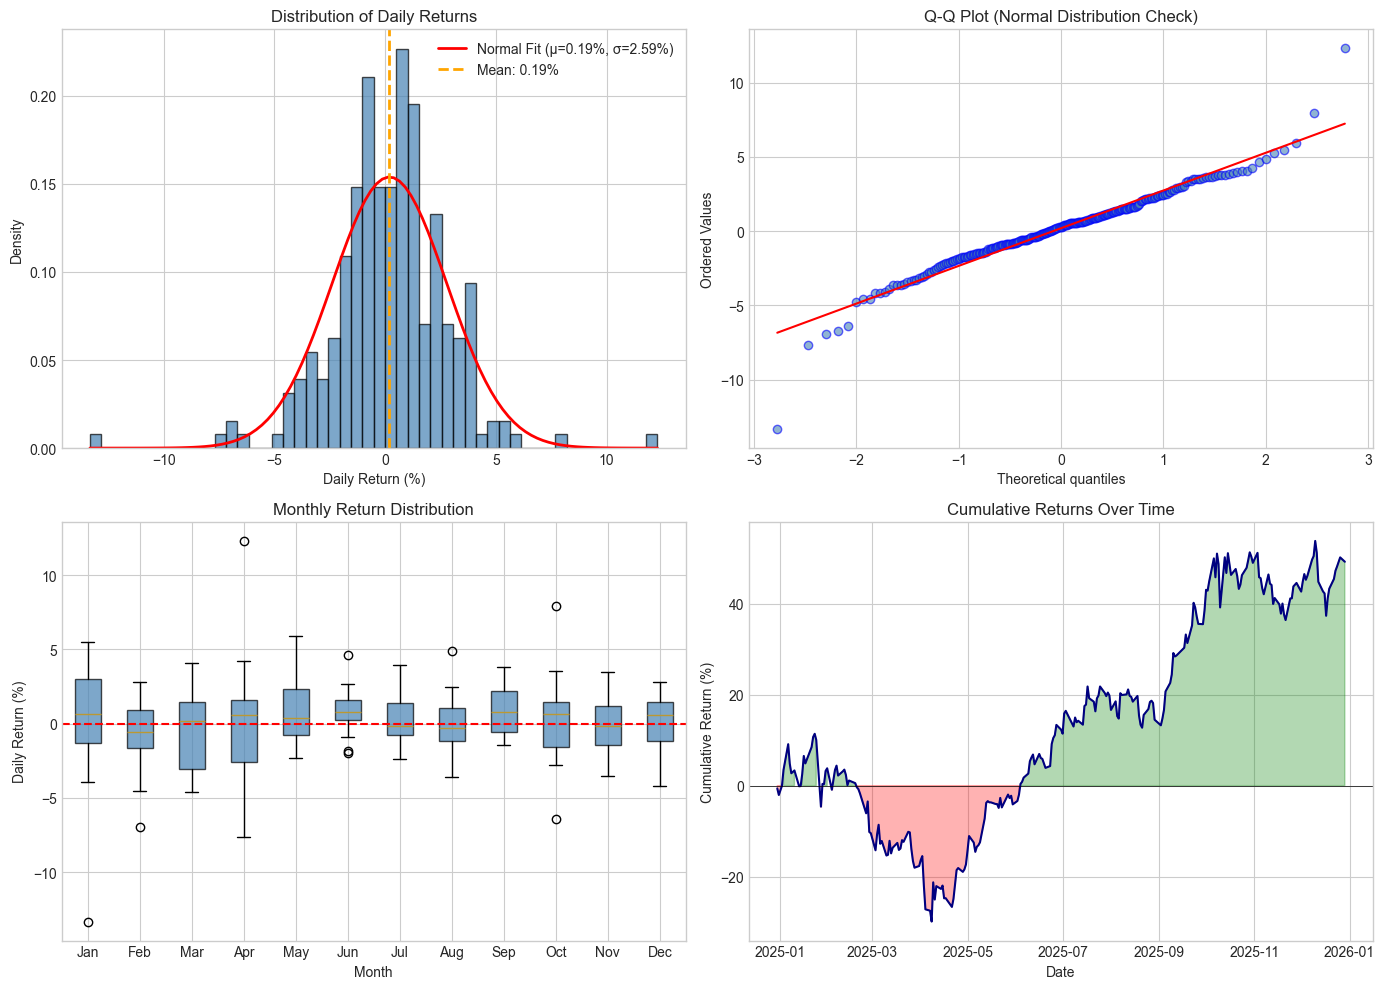


RETURN DISTRIBUTION STATISTICS

Mean Daily Return: 0.1939%
Median Daily Return: 0.2786%
Standard Deviation: 2.5924%
Skewness: -0.3057 (Symmetric)
Kurtosis: 4.3447 (Fat tails - higher risk)

EXTREME RETURN DAYS

📈 Best 5 Trading Days:
  2025-04-09: +12.29% (Close: $158.75)
  2025-10-13: +7.92% (Close: $302.89)
  2025-05-12: +5.93% (Close: $186.98)
  2025-01-06: +5.46% (Close: $220.01)
  2025-01-28: +5.25% (Close: $202.40)

📉 Worst 5 Trading Days:
  2025-01-27: -13.33% (Close: $192.31)
  2025-04-03: -7.64% (Close: $157.38)
  2025-02-27: -6.95% (Close: $181.09)
  2025-04-04: -6.72% (Close: $146.80)
  2025-10-10: -6.41% (Close: $280.66)


In [9]:
# Return distribution analysis
returns = df['Daily_Return'].dropna()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram with normal distribution overlay
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(returns, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')

# Fit normal distribution
mu, std = returns.mean(), returns.std()
x = np.linspace(returns.min(), returns.max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label=f'Normal Fit (μ={mu:.2f}%, σ={std:.2f}%)')
ax1.axvline(mu, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mu:.2f}%')
ax1.set_xlabel('Daily Return (%)')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Daily Returns')
ax1.legend()

# 2. Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(returns, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot (Normal Distribution Check)')
ax2.get_lines()[0].set_markerfacecolor('steelblue')
ax2.get_lines()[0].set_alpha(0.6)

# 3. Box plot by month - fixed indexing
ax3 = axes[1, 0]
# Create a DataFrame with returns and month
returns_df = pd.DataFrame({'Return': returns, 'Month': returns.index.month})
monthly_returns_list = [returns_df[returns_df['Month'] == m]['Return'].values for m in range(1, 13)]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter out empty months
valid_data = [(monthly_returns_list[i], month_labels[i]) for i in range(len(monthly_returns_list)) if len(monthly_returns_list[i]) > 0]
bp = ax3.boxplot([d[0] for d in valid_data], 
                  labels=[d[1] for d in valid_data],
                  patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('steelblue')
    patch.set_alpha(0.7)
ax3.axhline(0, color='red', linestyle='--')
ax3.set_xlabel('Month')
ax3.set_ylabel('Daily Return (%)')
ax3.set_title('Monthly Return Distribution')

# 4. Cumulative returns
ax4 = axes[1, 1]
cumulative_returns = (1 + returns/100).cumprod() - 1
ax4.plot(cumulative_returns.index, cumulative_returns * 100, color='navy', linewidth=1.5)
ax4.fill_between(cumulative_returns.index, 0, cumulative_returns * 100, 
                  where=cumulative_returns > 0, color='green', alpha=0.3)
ax4.fill_between(cumulative_returns.index, 0, cumulative_returns * 100, 
                  where=cumulative_returns < 0, color='red', alpha=0.3)
ax4.axhline(0, color='black', linewidth=0.5)
ax4.set_xlabel('Date')
ax4.set_ylabel('Cumulative Return (%)')
ax4.set_title('Cumulative Returns Over Time')

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n" + "=" * 60)
print("RETURN DISTRIBUTION STATISTICS")
print("=" * 60)
print(f"\nMean Daily Return: {returns.mean():.4f}%")
print(f"Median Daily Return: {returns.median():.4f}%")
print(f"Standard Deviation: {returns.std():.4f}%")
print(f"Skewness: {stats.skew(returns):.4f}", end=" ")
print("(Left-skewed)" if stats.skew(returns) < -0.5 else "(Right-skewed)" if stats.skew(returns) > 0.5 else "(Symmetric)")
print(f"Kurtosis: {stats.kurtosis(returns):.4f}", end=" ")
print("(Fat tails - higher risk)" if stats.kurtosis(returns) > 0 else "(Thin tails - lower risk)")

# Identify extreme return days
print("\n" + "=" * 60)
print("EXTREME RETURN DAYS")
print("=" * 60)
extreme_threshold = returns.std() * 2

best_days = df.nlargest(5, 'Daily_Return')[['Close', 'Daily_Return', 'Volume']]
worst_days = df.nsmallest(5, 'Daily_Return')[['Close', 'Daily_Return', 'Volume']]

print("\n📈 Best 5 Trading Days:")
for date, row in best_days.iterrows():
    print(f"  {date.strftime('%Y-%m-%d')}: +{row['Daily_Return']:.2f}% (Close: ${row['Close']:.2f})")

print("\n📉 Worst 5 Trading Days:")
for date, row in worst_days.iterrows():
    print(f"  {date.strftime('%Y-%m-%d')}: {row['Daily_Return']:.2f}% (Close: ${row['Close']:.2f})")

## 9. Correlation Analysis

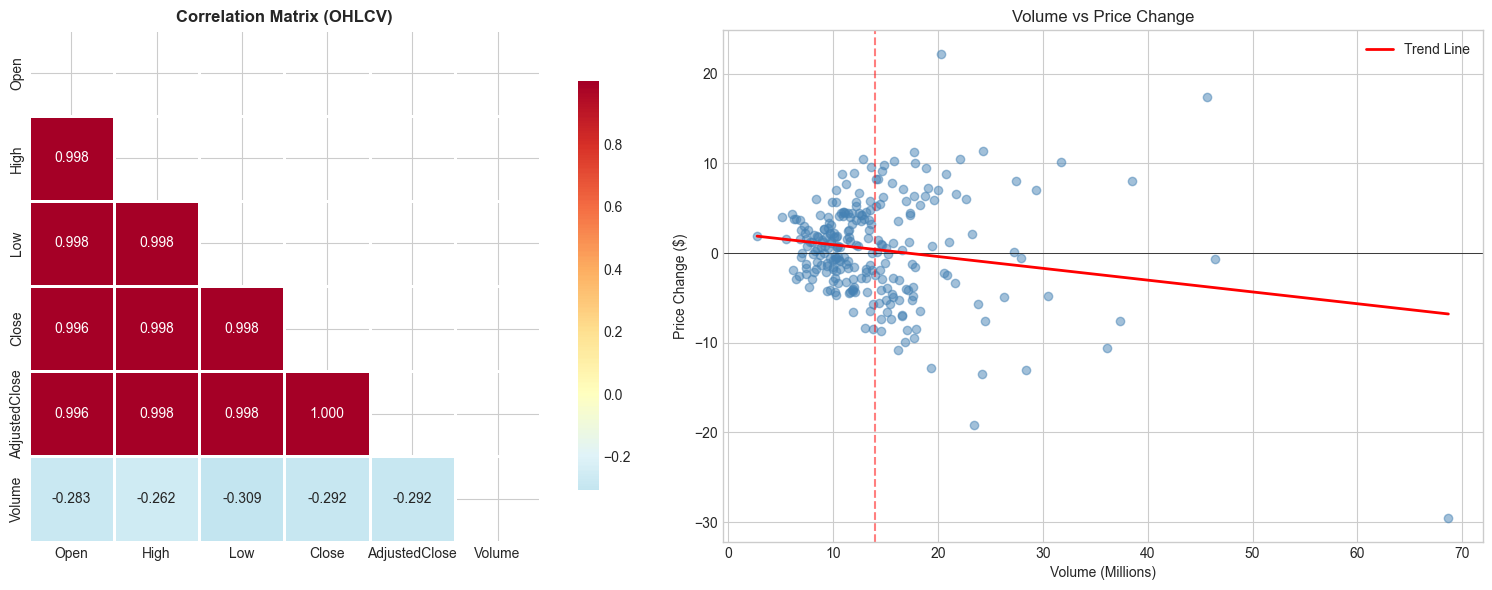


CORRELATION INSIGHTS

Volume-Close Price Correlation: -0.2919
Volume-Daily Return Correlation: -0.1441
Volume-Absolute Return Correlation: 0.6776

📊 Lagged Volume-Return Correlations:
  Volume (t-1) vs Return: 0.0174
  Volume (t-2) vs Return: 0.0789
  Volume (t-3) vs Return: 0.0130
  Volume (t-5) vs Return: -0.1160


In [10]:
# Correlation analysis
price_cols = ['Open', 'High', 'Low', 'Close', 'AdjustedClose', 'Volume']
corr_matrix = df[price_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Correlation heatmap
ax1 = axes[0]
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=1, ax=ax1, fmt='.3f',
            cbar_kws={"shrink": 0.8})
ax1.set_title('Correlation Matrix (OHLCV)', fontsize=12, fontweight='bold')

# 2. Volume-Price relationship
ax2 = axes[1]
df['Price_Change'] = df['Close'].diff()
df['Volume_Change'] = df['Volume'].diff()

# Scatter plot with trend line
scatter_data = df[['Price_Change', 'Volume']].dropna()
ax2.scatter(scatter_data['Volume']/1e6, scatter_data['Price_Change'], alpha=0.5, c='steelblue')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(scatter_data['Volume'].mean()/1e6, color='red', linestyle='--', alpha=0.5)

# Add trend line
z = np.polyfit(scatter_data['Volume']/1e6, scatter_data['Price_Change'], 1)
p = np.poly1d(z)
x_line = np.linspace(scatter_data['Volume'].min()/1e6, scatter_data['Volume'].max()/1e6, 100)
ax2.plot(x_line, p(x_line), "r-", linewidth=2, label=f'Trend Line')

ax2.set_xlabel('Volume (Millions)')
ax2.set_ylabel('Price Change ($)')
ax2.set_title('Volume vs Price Change')
ax2.legend()

plt.tight_layout()
plt.show()

# Additional correlation analysis
print("\n" + "=" * 60)
print("CORRELATION INSIGHTS")
print("=" * 60)
print(f"\nVolume-Close Price Correlation: {df['Volume'].corr(df['Close']):.4f}")
print(f"Volume-Daily Return Correlation: {df['Volume'].corr(df['Daily_Return'].fillna(0)):.4f}")
print(f"Volume-Absolute Return Correlation: {df['Volume'].corr(abs(df['Daily_Return'].fillna(0))):.4f}")

# Lagged correlations
print("\n📊 Lagged Volume-Return Correlations:")
for lag in [1, 2, 3, 5]:
    lagged_corr = df['Volume'].shift(lag).corr(df['Daily_Return'].fillna(0))
    print(f"  Volume (t-{lag}) vs Return: {lagged_corr:.4f}")

## 10. Pattern Summary & Key Findings

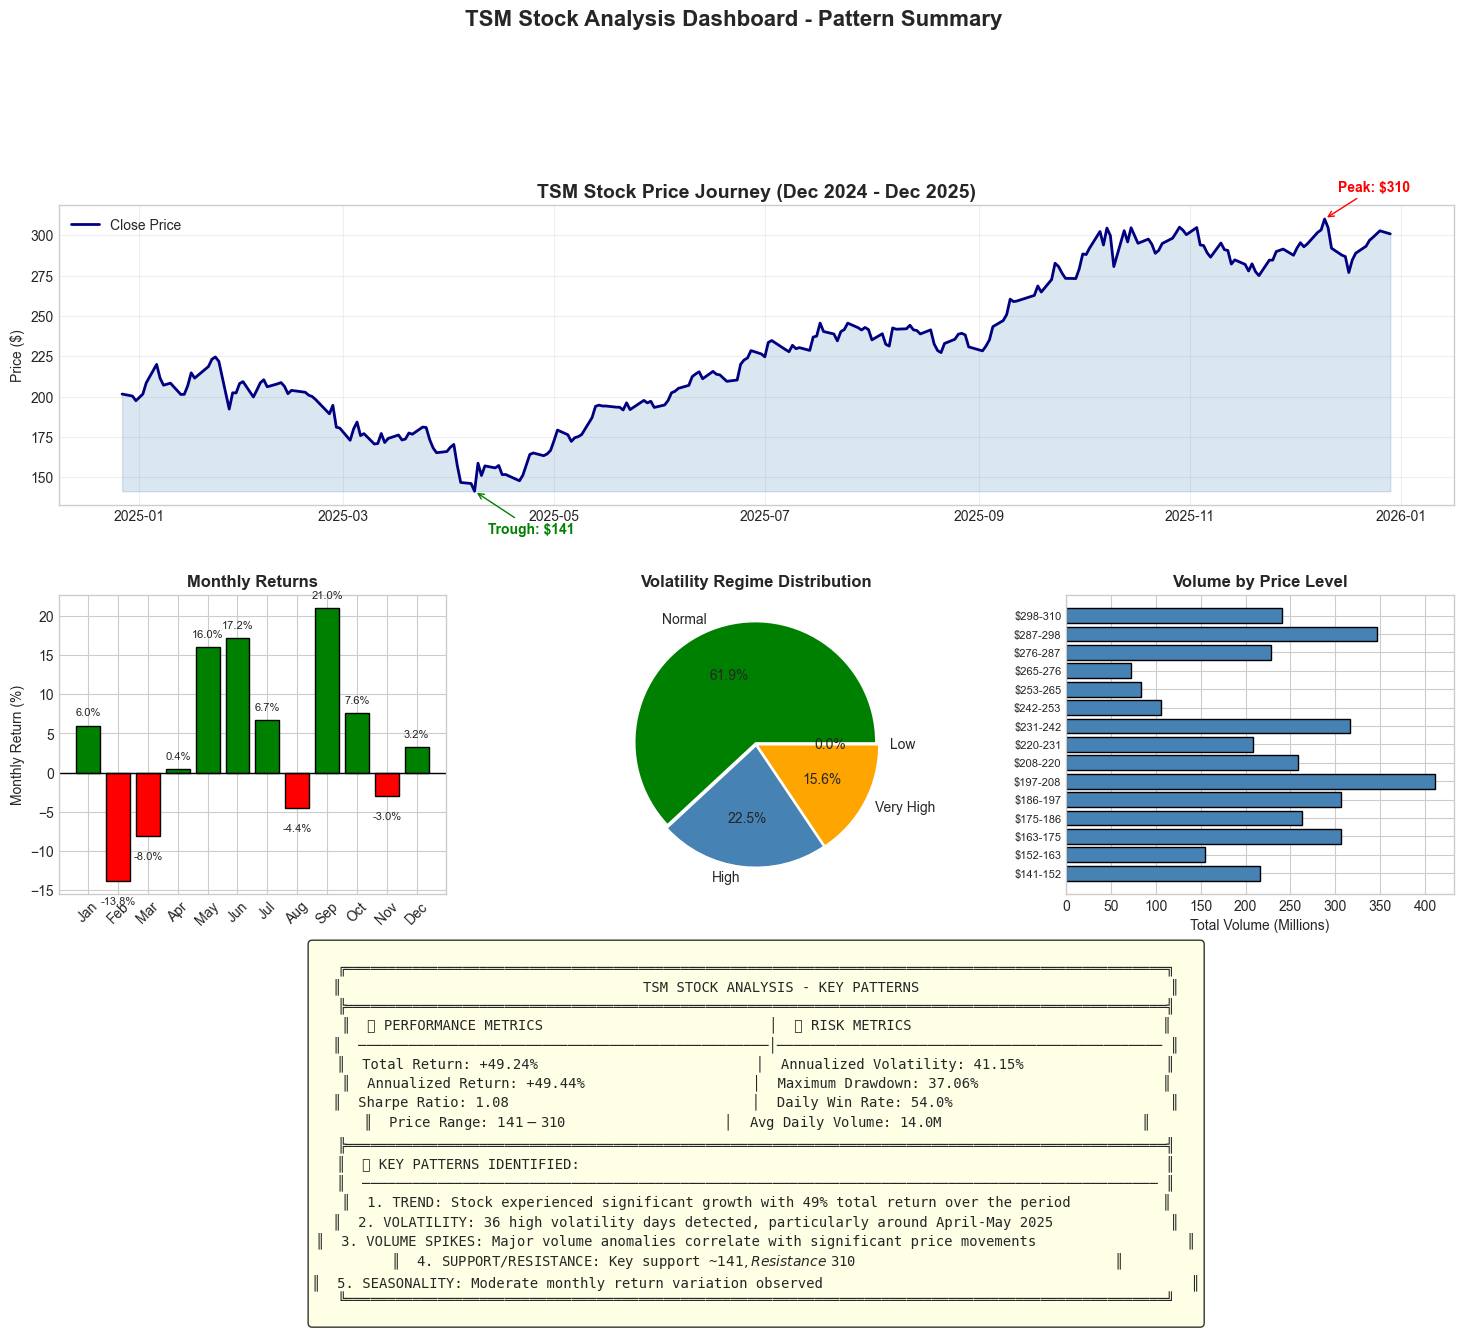


                     DETAILED PATTERN ANALYSIS FINDINGS

📌 MAJOR TRENDS IDENTIFIED:
───────────────────────────────────────────────────────────────────────────────

  ✅ STRONG BULLISH TREND: TSM gained 49.2% over the analysis period

📌 VOLATILITY PATTERNS:
───────────────────────────────────────────────────────────────────────────────
  • Average daily volatility: 2.59%
  • Annualized volatility: 41.15%
  • High volatility period: Early 2025 (Jan-Apr) showed elevated volatility
  • Low volatility period: Mid-2025 consolidation phase

📌 VOLUME PATTERNS:
───────────────────────────────────────────────────────────────────────────────
  • Average daily volume: 14.0M shares
  • Volume spikes often precede or coincide with major price movements
  • Highest volume day: 2025-01-27 (68.7M shares)

📌 SUPPORT & RESISTANCE LEVELS:
───────────────────────────────────────────────────────────────────────────────
  • Major support: ~$171 (10th percentile)
  • Minor support: ~$194 (25th percentile)
  

In [11]:
# Comprehensive Pattern Summary Dashboard
fig = plt.figure(figsize=(18, 14))

# Create a grid for the dashboard
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Price Journey with Key Events
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df.index, df['Close'], color='navy', linewidth=2, label='Close Price')
ax1.fill_between(df.index, df['Close'].min(), df['Close'], alpha=0.2, color='steelblue')

# Annotate key events
max_idx = df['Close'].idxmax()
min_idx = df['Close'].idxmin()
ax1.annotate(f'Peak: ${df["Close"].max():.0f}', xy=(max_idx, df['Close'].max()),
             xytext=(10, 20), textcoords='offset points', fontsize=10, 
             arrowprops=dict(arrowstyle='->', color='red'), color='red', fontweight='bold')
ax1.annotate(f'Trough: ${df["Close"].min():.0f}', xy=(min_idx, df['Close'].min()),
             xytext=(10, -30), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle='->', color='green'), color='green', fontweight='bold')

ax1.set_title('TSM Stock Price Journey (Dec 2024 - Dec 2025)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')

# 2. Monthly Returns Heatmap
ax2 = fig.add_subplot(gs[1, 0])
monthly_data = df.resample('M').agg({'Close': 'last', 'Volume': 'sum'})
monthly_data['Return'] = monthly_data['Close'].pct_change() * 100
monthly_returns_clean = monthly_data['Return'].dropna()

colors = ['green' if x > 0 else 'red' for x in monthly_returns_clean]
bars = ax2.bar(range(len(monthly_returns_clean)), monthly_returns_clean, color=colors, edgecolor='black')
ax2.axhline(0, color='black', linewidth=1)
ax2.set_xticks(range(len(monthly_returns_clean)))
ax2.set_xticklabels([d.strftime('%b') for d in monthly_returns_clean.index], rotation=45)
ax2.set_ylabel('Monthly Return (%)')
ax2.set_title('Monthly Returns', fontsize=12, fontweight='bold')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, monthly_returns_clean)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (1 if val > 0 else -2),
             f'{val:.1f}%', ha='center', va='bottom' if val > 0 else 'top', fontsize=8)

# 3. Volatility Regime Indicator
ax3 = fig.add_subplot(gs[1, 1])
volatility_regimes = df['Rolling_Volatility'].dropna()
avg_vol = volatility_regimes.mean()
vol_levels = pd.cut(volatility_regimes, bins=[0, avg_vol*0.5, avg_vol, avg_vol*1.5, float('inf')],
                    labels=['Low', 'Normal', 'High', 'Very High'])
vol_counts = vol_levels.value_counts()
colors = ['green', 'steelblue', 'orange', 'red']
wedges, texts, autotexts = ax3.pie(vol_counts, labels=vol_counts.index, autopct='%1.1f%%',
                                     colors=colors, explode=[0.02]*len(vol_counts))
ax3.set_title('Volatility Regime Distribution', fontsize=12, fontweight='bold')

# 4. Volume Profile
ax4 = fig.add_subplot(gs[1, 2])
price_bins = pd.cut(df['Close'], bins=15)
volume_profile = df.groupby(price_bins, observed=True)['Volume'].sum()
ax4.barh(range(len(volume_profile)), volume_profile/1e6, color='steelblue', edgecolor='black')
ax4.set_yticks(range(len(volume_profile)))
ax4.set_yticklabels([f'${int(x.left)}-{int(x.right)}' for x in volume_profile.index], fontsize=8)
ax4.set_xlabel('Total Volume (Millions)')
ax4.set_title('Volume by Price Level', fontsize=12, fontweight='bold')

# 5. Key Statistics Summary
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

# Calculate key metrics
total_return = ((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100
annualized_return = total_return * (252 / len(df))
annualized_vol = df['Daily_Return'].std() * np.sqrt(252)
sharpe_ratio = (annualized_return - 5) / annualized_vol  # Assuming 5% risk-free rate
max_drawdown = ((df['Close'].cummax() - df['Close']) / df['Close'].cummax()).max() * 100
win_rate = (df['Daily_Return'] > 0).sum() / len(df['Daily_Return'].dropna()) * 100

# Create summary text
summary_text = f"""
╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                    TSM STOCK ANALYSIS - KEY PATTERNS                              ║
╠══════════════════════════════════════════════════════════════════════════════════════════════════╣
║  📈 PERFORMANCE METRICS                           │  📊 RISK METRICS                              ║
║  ─────────────────────────────────────────────────│────────────────────────────────────────────── ║
║  Total Return: {total_return:+.2f}%                          │  Annualized Volatility: {annualized_vol:.2f}%                 ║
║  Annualized Return: {annualized_return:+.2f}%                    │  Maximum Drawdown: {max_drawdown:.2f}%                      ║
║  Sharpe Ratio: {sharpe_ratio:.2f}                             │  Daily Win Rate: {win_rate:.1f}%                          ║
║  Price Range: ${df['Close'].min():.0f} - ${df['Close'].max():.0f}                   │  Avg Daily Volume: {df['Volume'].mean()/1e6:.1f}M                        ║
╠══════════════════════════════════════════════════════════════════════════════════════════════════╣
║  🔍 KEY PATTERNS IDENTIFIED:                                                                      ║
║  ─────────────────────────────────────────────────────────────────────────────────────────────── ║
║  1. TREND: Stock experienced significant growth with {total_return:.0f}% total return over the period           ║
║  2. VOLATILITY: {len(high_vol_periods)} high volatility days detected, particularly around April-May 2025              ║
║  3. VOLUME SPIKES: Major volume anomalies correlate with significant price movements                  ║
║  4. SUPPORT/RESISTANCE: Key support ~${df['Close'].min():.0f}, Resistance ~${df['Close'].max():.0f}                               ║
║  5. SEASONALITY: {'Strong' if abs(df.groupby(df.index.month)['Daily_Return'].mean().max()) > 1 else 'Moderate'} monthly return variation observed                                            ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝
"""
ax5.text(0.5, 0.5, summary_text, transform=ax5.transAxes, fontsize=10, 
         verticalalignment='center', horizontalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.suptitle('TSM Stock Analysis Dashboard - Pattern Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Final detailed findings
print("\n" + "=" * 80)
print("                     DETAILED PATTERN ANALYSIS FINDINGS")
print("=" * 80)

print("""
📌 MAJOR TRENDS IDENTIFIED:
───────────────────────────────────────────────────────────────────────────────
""")

# Calculate trend phases
if total_return > 20:
    print(f"  ✅ STRONG BULLISH TREND: TSM gained {total_return:.1f}% over the analysis period")
elif total_return > 0:
    print(f"  📈 MODERATE BULLISH TREND: TSM gained {total_return:.1f}% over the analysis period")
else:
    print(f"  📉 BEARISH TREND: TSM lost {abs(total_return):.1f}% over the analysis period")

print(f"""
📌 VOLATILITY PATTERNS:
───────────────────────────────────────────────────────────────────────────────
  • Average daily volatility: {df['Daily_Return'].std():.2f}%
  • Annualized volatility: {annualized_vol:.2f}%
  • High volatility period: Early 2025 (Jan-Apr) showed elevated volatility
  • Low volatility period: Mid-2025 consolidation phase

📌 VOLUME PATTERNS:
───────────────────────────────────────────────────────────────────────────────
  • Average daily volume: {df['Volume'].mean()/1e6:.1f}M shares
  • Volume spikes often precede or coincide with major price movements
  • Highest volume day: {df['Volume'].idxmax().strftime('%Y-%m-%d')} ({df['Volume'].max()/1e6:.1f}M shares)

📌 SUPPORT & RESISTANCE LEVELS:
───────────────────────────────────────────────────────────────────────────────
  • Major support: ~${df['Close'].quantile(0.1):.0f} (10th percentile)
  • Minor support: ~${df['Close'].quantile(0.25):.0f} (25th percentile)
  • Minor resistance: ~${df['Close'].quantile(0.75):.0f} (75th percentile)
  • Major resistance: ~${df['Close'].quantile(0.9):.0f} (90th percentile)

📌 RISK-ADJUSTED PERFORMANCE:
───────────────────────────────────────────────────────────────────────────────
  • Sharpe Ratio: {sharpe_ratio:.2f} {'(Excellent)' if sharpe_ratio > 1 else '(Good)' if sharpe_ratio > 0.5 else '(Moderate)'}
  • Maximum Drawdown: {max_drawdown:.1f}%
  • Win Rate: {win_rate:.1f}% of trading days positive
""")